# Single-neuron-level analysis

### Analysis pipeline for concatenated recordings

*** To save notebook as pdf without code: ***
https://stackoverflow.com/questions/34818723/export-notebook-to-pdf-without-code?noredirect=1&lq=1

In [1]:
import numpy as np

import numpy.ma as ma

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
import os

sns.set()
sns.set_style("whitegrid")

from scipy.signal import medfilt 

from scipy.stats import skew, kurtosis, zscore

from scipy import signal

from sklearn.linear_model import LinearRegression, TheilSenRegressor

In [5]:
if 'google.colab' in str(get_ipython()):
  print('Running on CoLab')
  !wget https://raw.githubusercontent.com/mchini/Yang_Chini_et_al/testTransition/notebooks/capipeline.py
  !git clone https://github.com/j-friedrich/OASIS.git
  !pwd
  %cd /content/OASIS/
  !pwd
  !python setup.py build_ext --inplace
  %cd ..
  !pwd
  from sys import path
  path.append(r'/content/OASIS')
else:
  print('Not running on CoLab')

Not running on CoLab


In [2]:
from capipeline import *

/media/andrey/My Passport/OASIS-master/oasis/functions.py:13: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  warn("Could not find cvxpy. Don't worry, you can still use OASIS, " +


# Upload and reprocess data or upload pre-processed data (see below)

### Upload data from GIN

At the rate 0.5 MB/s, it takes abouts 30 min (1.5 GB of data, one animal, one condition for transition state recordings)

In [62]:
# mimic path TS_C_MMF_8237 (transition state, concatenated, MMF, animal 8237)
full_path = "/Anesthesia_CA1/calcium imaging transition state/concatenated/8237/20201105_GCaMP6f_8237_MMF/suite2p/plane0"
from pathlib import Path
path = Path('.' + full_path)
path.mkdir(parents=True, exist_ok=True)

In [63]:
# download data
%cd "./Anesthesia_CA1/calcium imaging transition state/concatenated/8237/20201105_GCaMP6f_8237_MMF/suite2p/plane0"
download_path = "https://gin.g-node.org/SW_lab/Anesthesia_CA1/raw/master/calcium%20imaging%20transition%20state/concatenated/8237/20201105_GCaMP6f_8237_MMF/suite2p/plane0/"
files = ["iscell.npy","stat.npy","F.npy","Fneu.npy"]
for f in files:
    link = download_path + f
    !wget $link
    
%cd "../../../../../../.."

# download meta_data
!wget "https://gin.g-node.org/SW_lab/Anesthesia_CA1/raw/master/meta_data/meta_recordings_transition_state.xlsx"

/media/andrey/My Passport/GITHUB_REPOS/Yang_Chini_et_al/notebooks/Anesthesia_CA1/calcium imaging transition state/concatenated/8237/20201105_GCaMP6f_8237_MMF/suite2p/plane0
--2021-02-22 20:13:22--  https://gin.g-node.org/SW_lab/Anesthesia_CA1/raw/master/calcium%20imaging%20transition%20state/concatenated/8237/20201105_GCaMP6f_8237_MMF/suite2p/plane0/iscell.npy
Resolving gin.g-node.org (gin.g-node.org)... 141.84.41.219
Connecting to gin.g-node.org (gin.g-node.org)|141.84.41.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘iscell.npy’

iscell.npy              [ <=>                ]  38,08K  --.-KB/s    in 0,02s   

2021-02-22 20:13:24 (1,72 MB/s) - ‘iscell.npy’ saved [38992]

--2021-02-22 20:13:25--  https://gin.g-node.org/SW_lab/Anesthesia_CA1/raw/master/calcium%20imaging%20transition%20state/concatenated/8237/20201105_GCaMP6f_8237_MMF/suite2p/plane0/stat.npy
Resolving gin.g-node.org (gin.g-node.org)... 141.

### Setup path and choose animals for the analysis

In [69]:
animals =['TS_C_MMF_8237']

database_path = './meta_recordings_transition_state.xlsx'

rec = get_recordings_for_animals(animals, database_path)

print("Recordings for the analysis: " + str(rec) )

Regordings for analysis: [18, 19, 20, 21, 22, 23, 24, 25, 26]


### Plot raster plot for the first three recordings 

NameError: name 'j' is not defined

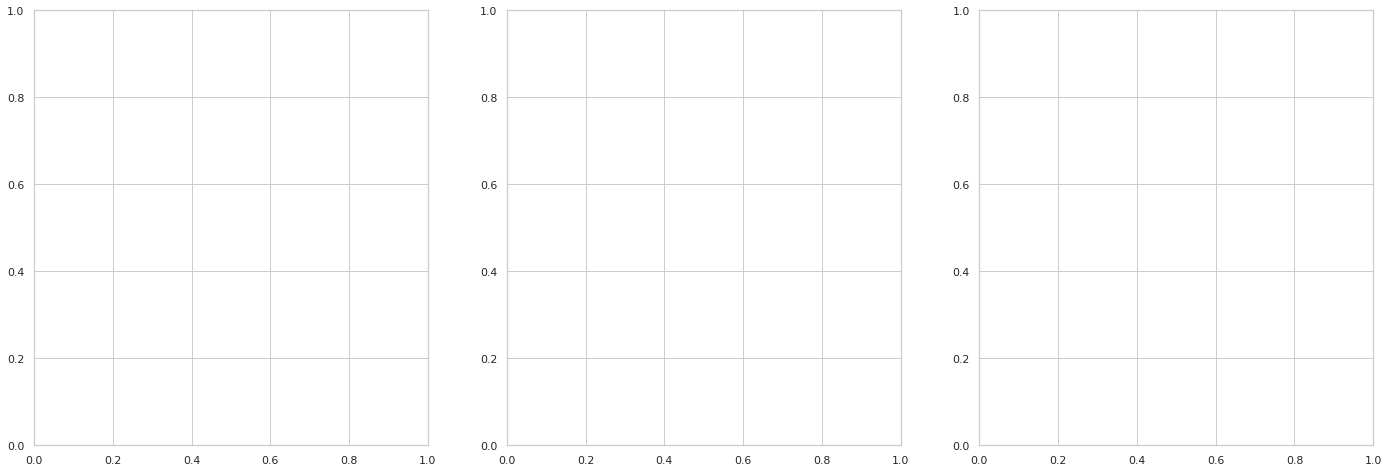

In [95]:
from capipeline import get_raster

nrec_to_plot = 3

starting_recording = rec[0]

fig, axes = plt.subplots(1, nrec_to_plot, figsize=(8*nrec_to_plot, 8), sharex=True)

for j in range(0,nrec_to_plot):
   
    raster = get_raster(starting_recording+j, 200, database_path, concatenation=True)
    
    axes[j].imshow(raster,extent=(0,7000,0,7000),cmap='Greys',vmin=0.25,vmax=1.0)
    
    axes[j].axis('off')

plt.show()

TS_C_MMF_8237 18 
Threshold for peak detection: 160
18 TS_C_MMF_8237 awake
Total trace length: 85000
Recording length: 5694
Analysis periods: [0, 5000]
Analysis period total frames:  5000


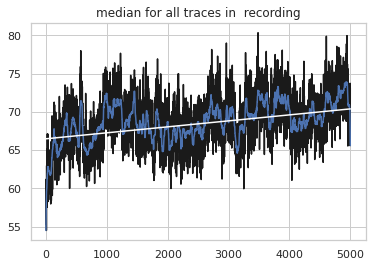

Median baseline: 34.51


/home/andrey/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/andrey/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Number of neurons accepted: 1170
*****
TS_C_MMF_8237 19 
Threshold for peak detection: 160
19 TS_C_MMF_8237 mmf
Total trace length: 85000
Recording length: 9000
Analysis periods: [0, 5000]
Analysis period total frames:  5000


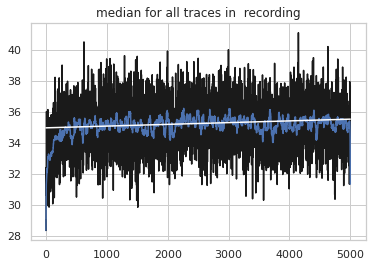

Median baseline: 12.73


/home/andrey/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/andrey/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Number of neurons accepted: 1170


KeyboardInterrupt: 

In [88]:
#### WHAT TO DO WITH EXCLUDED VALUES???

df_estimators = pd.DataFrame()

df_corrs =  pd.DataFrame()

for r in rec:
    
    animal = get_animal_from_recording(r, database_path)
    
    print(str(animal) + " " + str(r) + " ")

    if (animal=='TS_C_MMF_8237'): ### assign threshold
         threshold = 160
        
    print("Threshold for peak detection: " + str(threshold))
    df_e, df_c   = get_data_frame(r, database_path, threshold=threshold, baseline_correction=True,concatination=True)

    df_estimators = pd.concat([df_estimators,df_e])
    df_corrs = pd.concat([df_corrs,df_c])

    print("*****")

    
df_estimators['neuronID'] = df_estimators.index

### Store data frames

In [96]:
df_estimators.to_pickle("./df_estimators_TS_C_MMF_8237_n_peaks_baseline.pkl") 
df_corrs.to_pickle("./df_corrs_TS_C_MMF_8237_n_peaks_baseline.pkl") 

# Load reprocessed data

In [3]:
df_estimators = pd.read_pickle("./df_estimators_TS_C_MMF_8237_n_peaks_baseline.pkl")
df_corrs = pd.read_pickle("./df_corrs_TS_C_MMF_8237_n_peaks_baseline.pkl")

### Check availible conditions

In [98]:
np.unique(df_estimators.condition)

array(['awake'], dtype=object)

### Get statistics on the features and correlations 

**Main features (df_estimators):**

- n_peaks
- width.median
- height.median
- decay time
- skewness
- integral
- baseline
- number of active neurons

**Correlations (df_corrs):**

- Pearson correlation of neurons 
- absolute Pearson correlation of neurons

In [5]:
df_estimators.describe()

,recording,neuronID,n.accepted,length.frames,length.minutes,n.accepted_and_rejected,traces.median,npil.median,trace.std,npil.std,...,baseline.oasis,integral,Tm0p7Ncorr.mean,peak_detection_threshold,decay_isol,decay_no_isol,n_peaks,n_peaks_per_recording,height.median,width.median
count,10530.000000,10530.000000,10530.0,10530.000000,10530.000000,10530.0,10530.000000,10530.000000,10530.000000,10530.000000,...,10530.000000,10530.000000,10530.000000,10530.0,10530.000000,10530.000000,10530.000000,10530.000000,8573.000000,8573.000000
mean,22.000000,584.500000,1170.0,5111.111111,2.839506,2429.0,276.193268,256.982513,27.906294,27.906294,...,33.851483,70.530825,0.001777,160.0,2.358118,0.668918,40.585704,115.607597,255.688462,61.612957
std,2.582112,337.765823,0.0,314.284604,0.174603,0.0,178.007980,136.855087,27.797024,27.797024,...,59.080215,105.885473,0.004410,0.0,7.770262,0.491665,44.048309,126.088156,119.514399,179.706254
min,18.000000,0.000000,1170.0,5000.000000,2.777778,2429.0,0.000000,42.001099,3.671381,3.671381,...,0.000000,-568.994583,-0.024061,160.0,0.004825,0.005221,0.000000,0.000000,160.036316,1.847015
25%,20.000000,292.000000,1170.0,5000.000000,2.777778,2429.0,155.743740,155.073753,12.949378,12.949378,...,0.000039,7.469192,0.000040,160.0,0.106243,0.183865,0.720000,2.000000,183.627823,12.684397
50%,22.000000,584.500000,1170.0,5000.000000,2.777778,2429.0,232.062943,220.850372,19.934484,19.934484,...,7.998768,53.638537,0.001451,160.0,0.352873,0.635967,19.440000,55.000000,210.574097,20.093484
75%,24.000000,877.000000,1170.0,5000.000000,2.777778,2429.0,349.728149,328.991821,31.527514,31.527514,...,46.124276,113.528742,0.003599,160.0,0.555078,1.103994,82.800000,234.000000,282.922668,45.549530
max,26.000000,1169.000000,1170.0,6000.000000,3.333333,2429.0,1661.458862,949.584839,372.736633,372.736633,...,842.286785,917.365800,0.026182,160.0,33.316664,1.649311,131.760000,439.000000,1405.087036,4866.486644


In [6]:
df_corrs.describe()

,recording,Tm0p7Ncorr,Tm0p7Ncorr.abs
count,1.232010e+07,1.230957e+07,1.230957e+07
mean,2.200000e+01,9.229237e-04,3.036242e-02
std,2.581989e+00,5.583744e-02,4.686998e-02
min,1.800000e+01,-9.883481e-01,3.660796e-09
25%,2.000000e+01,-1.709684e-02,7.662017e-03
50%,2.200000e+01,-8.603377e-05,1.701841e-02
75%,2.400000e+01,1.693834e-02,3.396463e-02
max,2.600000e+01,9.913196e-01,9.913196e-01


### Get median value of the feature for a given animal

In [7]:
df_estimators[(df_estimators.animal=='TS_C_MMF_8237')].groupby('condition', as_index=False)['n_peaks'].median()

,condition,n_peaks
0,awake,18.72
1,mmf,0.00
2,post120,30.30
3,post180,35.46
4,post240,25.56
5,post30,4.32
6,post300,42.12
7,post360,42.84
8,post60,18.00


In [102]:
df_corrs[(df_corrs['Tm0p7Ncorr.abs'] < 0.999)].groupby('condition', as_index=False)['Tm0p7Ncorr.abs'].median()

,condition,Tm0p7Ncorr.abs
0,awake,0.026326
1,mmf,0.009634
2,post120,0.014517
3,post180,0.017756
4,post240,0.016682
5,post30,0.014929
6,post300,0.023240
7,post360,0.036034
8,post60,0.013139


### Violin plot for a given feature

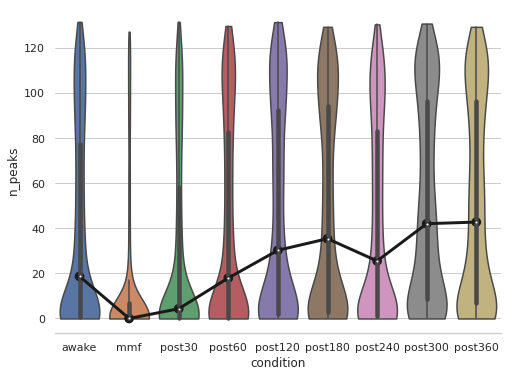

In [10]:
feature = 'n_peaks' # number of peaks per min
conditions = ["awake","mmf","post30","post60","post120","post180","post240","post300","post360"]

f, axes = plt.subplots(1, 1, figsize=(8, 6), sharex=True)
sns.despine(left=True)
#axes.set_ylim([0, 100.0])
sns.violinplot(x='condition', y=feature, data=df_estimators,ax=axes,order = conditions,scale='width',cut=0)
sns.pointplot(x='condition', y=feature, markers='o', scale=1.1, color='k',data=df_estimators.groupby('condition', as_index=False)[feature].median(), ax=axes,order=conditions)
plt.savefig("n_peaks.png")
plt.savefig("n_peaks.eps")

### Violin plot for correlations

Text(0, 0.5, 'Absolute Pearson Correlation')

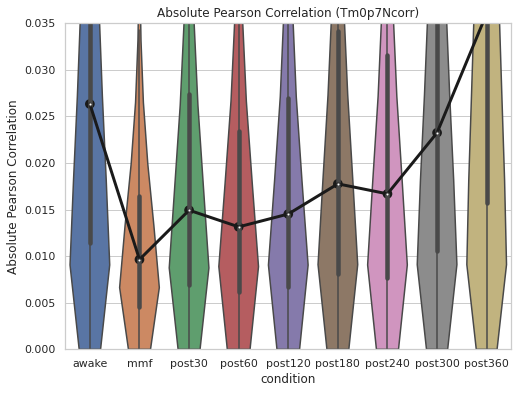

In [11]:
plt.rcParams['figure.figsize'] = [8, 6]

sns.violinplot(x='condition', y='Tm0p7Ncorr.abs',data=df_corrs[(df_corrs['Tm0p7Ncorr.abs'] < 0.9)],order=["awake","mmf","post30","post60","post120","post180","post240","post300","post360"],scale='width',cut=0)
sns.pointplot(x='condition', y='Tm0p7Ncorr.abs', markers='o', scale=1.1, color='k',data=df_corrs[(df_corrs['Tm0p7Ncorr.abs'] < 0.9)].groupby('condition', as_index=False)['Tm0p7Ncorr.abs'].median(),order=["awake","mmf","post30","post60","post120","post180","post240","post300","post360"])

plt.ylim([-0.00,0.035])
#plt.yscale('log')
#plt.savefig("correlations.png")
#plt.savefig("correlations.eps")
plt.title("Absolute Pearson Correlation (Tm0p7Ncorr)")
plt.ylabel("Absolute Pearson Correlation")


# Single-neuron level analysis

In [11]:
df_estimators['neuronID'] = df_estimators.index # make a column from neuronID (to be removed from here and added to the reprocessing)

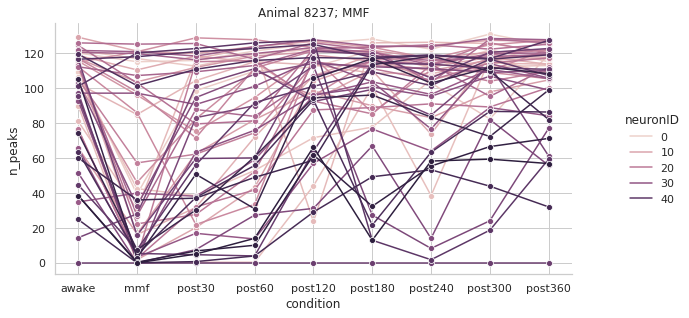

In [17]:
g=sns.relplot(x = 'condition',y = 'n_peaks', data = df_estimators[df_estimators.neuronID<50], marker='o',hue='neuronID',kind='line')
g.fig.set_size_inches(10,4)
plt.title("Animal 8237; MMF")
plt.savefig("single-neuron-level-analysis.png")
plt.savefig("single-neuron-level-analysis.eps")

# Single-neuron level analysis (interactive)

### Number of transients in different conditions; color represents median hight of transients, while size their median decay time

In [7]:
import plotly.express as px

x_axis = "condition"
y_axis = "n_peaks"
line_group = "neuronID"
color = "neuronID"

fig = px.line(df_estimators[df_estimators.neuronID<50], x=x_axis, y=y_axis, line_group=line_group,color=color,width=1000, height=600)

#fig.write_image("n_peaks_interactive.svg")

fig.show()

In [6]:
import plotly.express as px

x_axis = "condition"
y_axis = "n_peaks"
marker_color = "height.median"
marker_size = 'decay_no_isol'

fig = px.scatter(df_estimators[df_estimators.neuronID<50], x=x_axis, y=y_axis, color=marker_color,
                 size=marker_size,width=1000, height=600)
#fig.write_image("n_peaks_scatter_interactive.eps")
#fig.write_image("n_peaks_scatter_interactive.png")
fig.show()